SECOND APRROACH
TOP_10 FEATURES

 Gradient Boosting (Top 10 Features)
R²   (R-squared):              0.1229
MSE  (Mean Squared Error):     20882556383498.01
MAPE (Mean Absolute % Error):  43.42%

 Polynomial Regression (Top 10 Poly Features)
R²   (R-squared):              -0.2650
MSE  (Mean Squared Error):     30119589648258.14
MAPE (Mean Absolute % Error):  61.70%

Linear Regression (Top 10 Features)
R²   (R-squared):              -0.0266
MSE  (Mean Squared Error):     24441534426507.49
MAPE (Mean Absolute % Error):  43.01%

Random Forest (Top 10 Features)
R²   (R-squared):              0.1711
MSE  (Mean Squared Error):     19735600039408.47
MAPE (Mean Absolute % Error):  42.17%

XGBoost (Top 10 Features)
R²   (R-squared):              -0.0636
MSE  (Mean Squared Error):     25322711644142.72
MAPE (Mean Absolute % Error):  47.77%


Train the model using all features to get the importances
Then select the top 10 features based on importance
Retrain the model using only those top 10 features
Evaluate again with clean metrics


🔝 Top 10 Feature Importances:
Total_Returns: 0.4157
AgeClass_2.1: 0.2758
total_spawners_y_minus_2_to_4: 0.0577
AgeClass_1.2: 0.0302
total_spawners_y_minus_3: 0.0294
total_spawners_y_minus_2: 0.0288
total_spawners_y_minus_4: 0.0181
npgo_mean_DecFeb: 0.0175
AgeClass_1.4: 0.0149
AgeClass_2.2: 0.0127


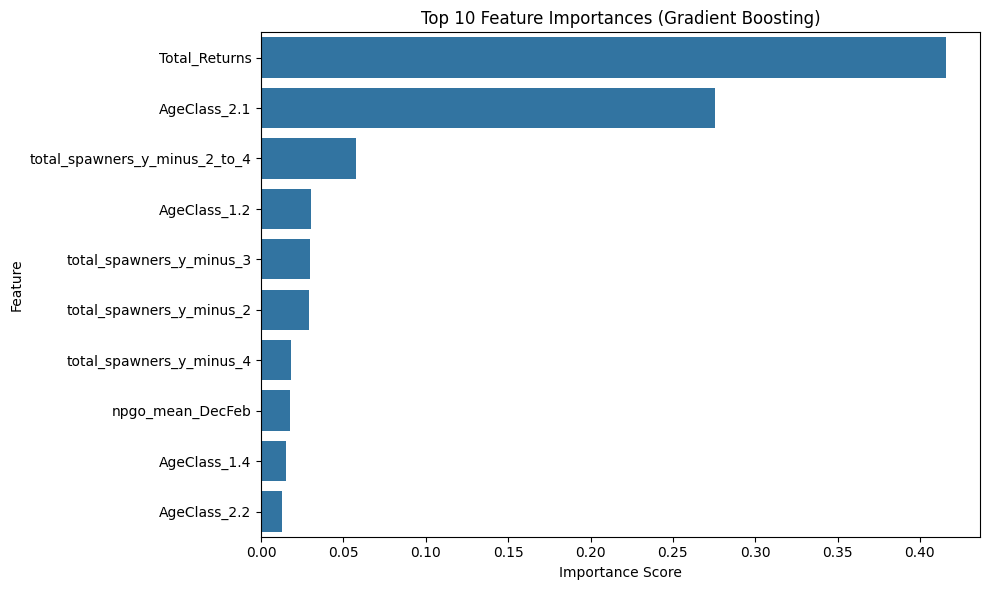


📊 Gradient Boosting (Top 10 Features)
SECOND APPROACH - TOP 10 FEATURES
R²   (R-squared test):          0.1229
R²   (R-squared train):         0.9951
MSE  (Mean Squared Error):      20882556383498.01
MAPE (Mean Absolute % Error):   43.42%


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']
X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# 🔹 Step 1: Train full model with all features
gbr_full = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gbr_full.fit(X_train, y_train)

# 🔹 Step 2: Extract top 10 features by importance
feature_importances = pd.Series(gbr_full.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)
top_10_features = top_features.head(10).index.tolist()

print("\n🔝 Top 10 Feature Importances:")
for feature in top_10_features:
    print(f"{feature}: {top_features[feature]:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.head(10).values, y=top_10_features)
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 3: Retrain using only top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

gbr_top10 = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gbr_top10.fit(X_train_top10, y_train)

# 🔹 Step 4: Predict and evaluate
y_pred_test = gbr_top10.predict(X_test_top10)
y_pred_train = gbr_top10.predict(X_train_top10)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n📊 Gradient Boosting (Top 10 Features)")
print("SECOND APPROACH - TOP 10 FEATURES")
print(f"R²   (R-squared test):          {r2_test:.4f}")
print(f"R²   (R-squared train):         {r2_train:.4f}")
print(f"MSE  (Mean Squared Error):      {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  10 FEATURES \n"
    "Gradient Boosting:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X_train.columns)

# 🔹 Step 2: Train full polynomial model
model_full = LinearRegression()
model_full.fit(X_train_poly, y_train)

# 🔹 Step 3: Evaluate full model
y_pred_full_test = model_full.predict(X_test_poly)
y_pred_full_train = model_full.predict(X_train_poly)

r2_test_full = r2_score(y_test, y_pred_full_test)
r2_train_full = r2_score(y_train, y_pred_full_train)
mse_full = mean_squared_error(y_test, y_pred_full_test)
mape_full = np.mean(np.abs((y_test - y_pred_full_test) / y_test)) * 100

print("\n📊 Polynomial Regression (All Features)")
print(f"R²   (R-squared test):          {r2_test_full:.4f}")
print(f"R²   (R-squared train):         {r2_train_full:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_full:.2f}%")

# 🔹 Step 4: Get top 10 influential polynomial features
coef_series = pd.Series(np.abs(model_full.coef_), index=feature_names)
top_10_poly_features = coef_series.sort_values(ascending=False).head(10)

print("\n🔝 Top 10 Most Influential Polynomial Features:")
print(top_10_poly_features)

# 🔹 Step 5: Filter only those features
top_10_indices = [list(feature_names).index(f) for f in top_10_poly_features.index]
X_train_top10 = X_train_poly[:, top_10_indices]
X_test_top10 = X_test_poly[:, top_10_indices]

# 🔹 Step 6: Retrain and evaluate
model_top10 = LinearRegression()
model_top10.fit(X_train_top10, y_train)

y_pred_top10_test = model_top10.predict(X_test_top10)
y_pred_top10_train = model_top10.predict(X_train_top10)

r2_test_top10 = r2_score(y_test, y_pred_top10_test)
r2_train_top10 = r2_score(y_train, y_pred_top10_train)
mse_top10 = mean_squared_error(y_test, y_pred_top10_test)
mape_top10 = np.mean(np.abs((y_test - y_pred_top10_test) / y_test)) * 100

print("\n📊 Polynomial Regression (Top 10 Poly Features)")
print("SECOND APPROACH - TOP 10 FEATURES")
print(f"R²   (R-squared test):          {r2_test_top10:.4f}")
print(f"R²   (R-squared train):         {r2_train_top10:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_top10:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_top10:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  10 FEATURES \n"
    "Polynomial Regression:\n"
    f"R²   (R-squared test):          {r2_test_top10:.4f}\n"
    f"R²   (R-squared train):         {r2_train_top10:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse_top10:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape_top10:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)



📊 Polynomial Regression (All Features)
R²   (R-squared test):          -1162.8503
R²   (R-squared train):         1.0000
MSE  (Mean Squared Error):      27710397213480312.00
MAPE (Mean Absolute % Error):   792.85%

🔝 Top 10 Most Influential Polynomial Features:
ao_mean_DecMar total_spawners_y_minus_3     1.616260
AgeClass_1.3 River_Naknek                   1.498140
ao_mean_DecMar total_spawners_y_minus_2     1.223360
AgeClass_0.4 AgeClass_3.2                   1.208441
AgeClass_3.1 AgeClass_3.2                   0.912616
AgeClass_2.4 AgeClass_3.1                   0.866865
sst_aprjul total_spawners_y_minus_3         0.829257
sst_anom total_spawners_y_minus_3           0.829173
AgeClass_1.3 mei_mean_AprSep                0.780727
pdo_mean_DecMar total_spawners_y_minus_2    0.763431
dtype: float64

📊 Polynomial Regression (Top 10 Poly Features)
SECOND APPROACH - TOP 10 FEATURES
R²   (R-squared test):          -0.2650
R²   (R-squared train):         0.3668
MSE  (Mean Squared Error):     


📊 Linear Regression (All Features)
R²   (R-squared test):          0.1307
R²   (R-squared train):         0.6878
MSE  (Mean Squared Error):      20696362484617.75
MAPE (Mean Absolute % Error):   48.95%

🔝 Top 10 Most Influential Features:
River_Egegik: 2322567.2362
River_Igushik: -1414109.5431
River_Kvichak: 1373068.4012
River_Nushagak: -1171105.8195
River_Alagnak: -1071546.5172
ao_mean_DecMar: 382916.7857
oni_mean_DecFeb: 327579.8561
River_Naknek: -293158.3866
npi_mean_NovMar: 263974.4779
River_Wood: 254284.6290


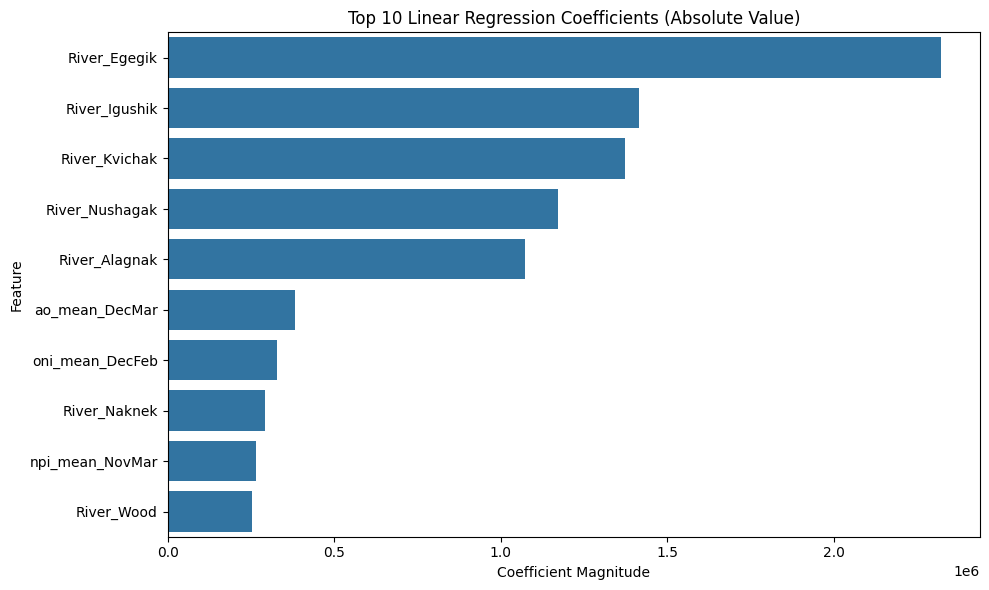


📊 Linear Regression (Top 10 Features)
SECOND APPROACH - TOP 10 FEATURES
R²   (R-squared test):          -0.0266
R²   (R-squared train):         0.5095
MSE  (Mean Squared Error):      24441534426507.49
MAPE (Mean Absolute % Error):   43.01%


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train on all features
model_full = LinearRegression()
model_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full_test = model_full.predict(X_test_full)
y_pred_full_train = model_full.predict(X_train_full)

r2_test_full = r2_score(y_test, y_pred_full_test)
r2_train_full = r2_score(y_train, y_pred_full_train)
mse_full = mean_squared_error(y_test, y_pred_full_test)
mape_full = np.mean(np.abs((y_test - y_pred_full_test) / y_test)) * 100

print("\n📊 Linear Regression (All Features)")
print(f"R²   (R-squared test):          {r2_test_full:.4f}")
print(f"R²   (R-squared train):         {r2_train_full:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_full:.2f}%")

# 🔹 Step 3: Top 10 most influential features
coefs = pd.Series(model_full.coef_, index=X_train_full.columns)
top_10_features = coefs.abs().sort_values(ascending=False).head(10).index.tolist()

print("\n🔝 Top 10 Most Influential Features:")
for feature in top_10_features:
    print(f"{feature}: {coefs[feature]:.4f}")

# Optional plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs[top_10_features].abs().values, y=top_10_features)
plt.title("Top 10 Linear Regression Coefficients (Absolute Value)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using only top 10 features
X_train_top10 = X_train_full[top_10_features]
X_test_top10 = X_test_full[top_10_features]

model_top10 = LinearRegression()
model_top10.fit(X_train_top10, y_train)

# 🔹 Step 5: Evaluate top 10 model
y_pred_top10_test = model_top10.predict(X_test_top10)
y_pred_top10_train = model_top10.predict(X_train_top10)

r2_test_top10 = r2_score(y_test, y_pred_top10_test)
r2_train_top10 = r2_score(y_train, y_pred_top10_train)
mse_top10 = mean_squared_error(y_test, y_pred_top10_test)
mape_top10 = np.mean(np.abs((y_test - y_pred_top10_test) / y_test)) * 100

print("\n📊 Linear Regression (Top 10 Features)")
print("SECOND APPROACH - TOP 10 FEATURES")
print(f"R²   (R-squared test):          {r2_test_top10:.4f}")
print(f"R²   (R-squared train):         {r2_train_top10:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_top10:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_top10:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  10 FEATURES \n"
    "Linear Regression:\n"
    f"R²   (R-squared test):          {r2_test_top10:.4f}\n"
    f"R²   (R-squared train):         {r2_train_top10:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse_top10:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape_top10:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


📊 Random Forest (All Features)
R²   (R-squared test):          0.3365
R²   (R-squared train):         0.9534
MSE  (Mean Squared Error):      15798473800211.39
MAPE (Mean Absolute % Error):   40.17%

🔝 Top 10 Feature Importances:
Total_Returns                    0.305940
AgeClass_2.1                     0.269707
total_spawners_y_minus_2_to_4    0.065359
AgeClass_2.2                     0.055961
total_spawners_y_minus_4         0.051027
total_spawners_y_minus_2         0.034129
total_spawners_y_minus_3         0.024447
AgeClass_1.2                     0.022840
AgeClass_0.3                     0.014620
AgeClass_1.3                     0.013551
dtype: float64


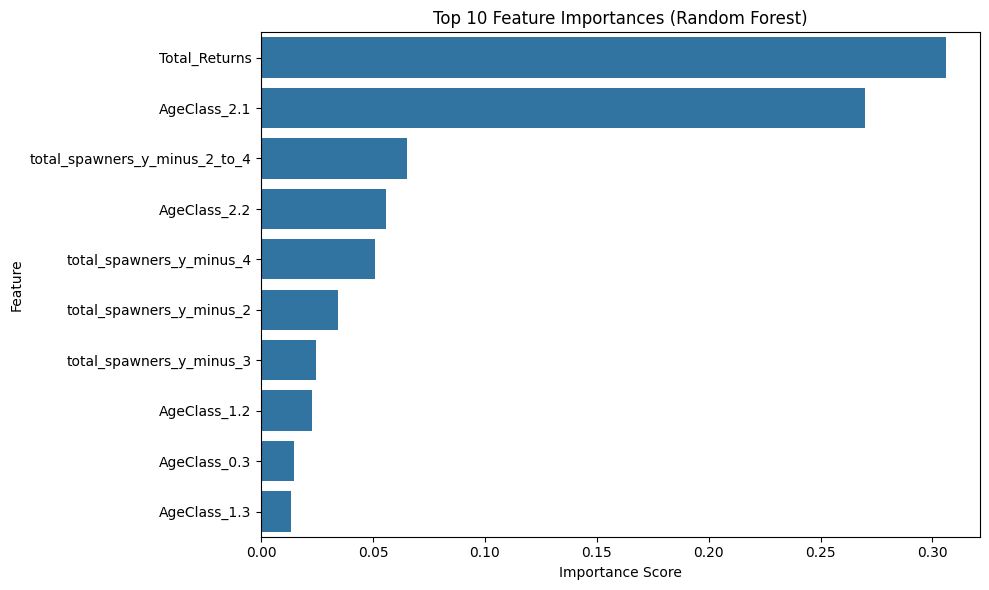


📊 Random Forest (Top 10 Features)
SECOND APPROACH - TOP 10 FEATURES
R²   (R-squared test):          0.1711
R²   (R-squared train):         0.9548
MSE  (Mean Squared Error):      19735600039408.47
MAPE (Mean Absolute % Error):   42.17%


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train using ALL features
rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full_test = rf_full.predict(X_test_full)
y_pred_full_train = rf_full.predict(X_train_full)

r2_test_full = r2_score(y_test, y_pred_full_test)
r2_train_full = r2_score(y_train, y_pred_full_train)
mse_full = mean_squared_error(y_test, y_pred_full_test)
mape_full = np.mean(np.abs((y_test - y_pred_full_test) / y_test)) * 100

print("\n📊 Random Forest (All Features)")
print(f"R²   (R-squared test):          {r2_test_full:.4f}")
print(f"R²   (R-squared train):         {r2_train_full:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_full:.2f}%")

# 🔹 Step 3: Get top 10 features by importance
feature_importances = pd.Series(rf_full.feature_importances_, index=X_train_full.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

print("\n🔝 Top 10 Feature Importances:")
print(top_10_features)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using only top 10 features
X_train_top10 = X_train_full[top_10_features.index]
X_test_top10 = X_test_full[top_10_features.index]

rf_top10 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top10.fit(X_train_top10, y_train)

# 🔹 Step 5: Evaluate top 10 model
y_pred_top10_test = rf_top10.predict(X_test_top10)
y_pred_top10_train = rf_top10.predict(X_train_top10)

r2_test_top10 = r2_score(y_test, y_pred_top10_test)
r2_train_top10 = r2_score(y_train, y_pred_top10_train)
mse_top10 = mean_squared_error(y_test, y_pred_top10_test)
mape_top10 = np.mean(np.abs((y_test - y_pred_top10_test) / y_test)) * 100

print("\n📊 Random Forest (Top 10 Features)")
print("SECOND APPROACH - TOP 10 FEATURES")
print(f"R²   (R-squared test):          {r2_test_top10:.4f}")
print(f"R²   (R-squared train):         {r2_train_top10:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_top10:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_top10:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  10 FEATURES \n"
    "Random Forest:\n"
    f"R²   (R-squared test):          {r2_test_top10:.4f}\n"
    f"R²   (R-squared train):         {r2_train_top10:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse_top10:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape_top10:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)



📊 XGBoost (All Features)
R²   (R-squared test):         -0.0373
R²   (R-squared train):        1.0000
MSE  (Mean Squared Error):     24696531534541.34
MAPE (Mean Absolute % Error):  48.36%

🔝 Top 10 Feature Importances:
AgeClass_2.1                     0.321799
Total_Returns                    0.179241
total_spawners_y_minus_2_to_4    0.095772
sst_aprjul                       0.061558
total_spawners_y_minus_2         0.052664
AgeClass_3.1                     0.044382
sss_mayaug                       0.043381
mei_mean_AprSep                  0.021251
total_spawners_y_minus_4         0.020663
AgeClass_1.5                     0.015911
dtype: float32


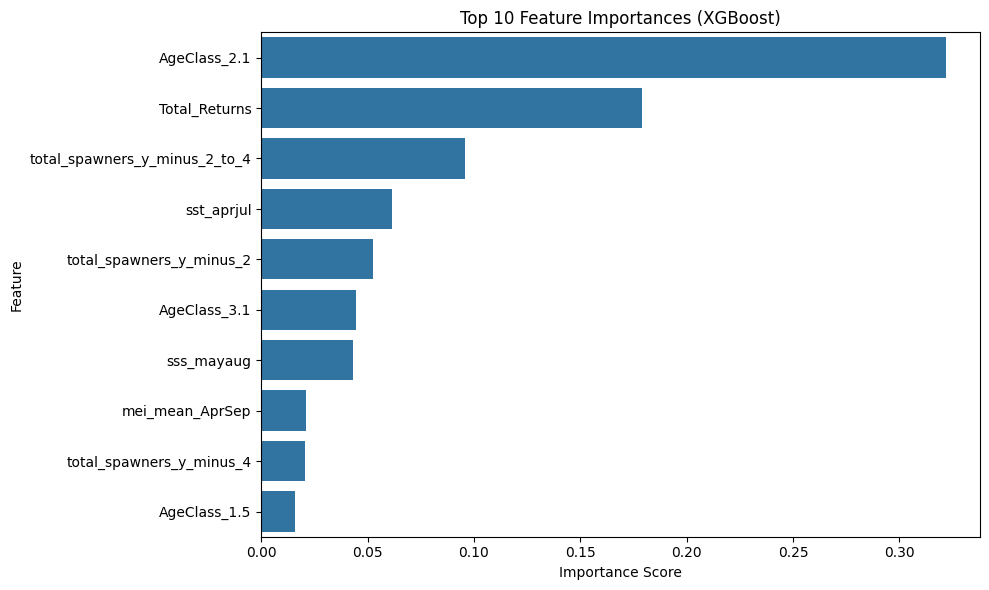


📊 XGBoost (Top 10 Features)
SECOND APPROACH - TOP 10 FEATURES
R²   (R-squared test):         -0.0636
R²   (R-squared train):        1.0000
MSE  (Mean Squared Error):     25322711644142.72
MAPE (Mean Absolute % Error):  47.77%


In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths — using full feature set
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train on all features
xgb_full = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_test_full = xgb_full.predict(X_test_full)
y_pred_train_full = xgb_full.predict(X_train_full)

r2_test_full = r2_score(y_test, y_pred_test_full)
r2_train_full = r2_score(y_train, y_pred_train_full)
mse_full = mean_squared_error(y_test, y_pred_test_full)
mape_full = np.mean(np.abs((y_test - y_pred_test_full) / y_test)) * 100

print("\n📊 XGBoost (All Features)")
print(f"R²   (R-squared test):         {r2_test_full:.4f}")
print(f"R²   (R-squared train):        {r2_train_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 10 features by importance
feature_importances = pd.Series(xgb_full.feature_importances_, index=X_train_full.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

print("\n🔝 Top 10 Feature Importances:")
print(top_10_features)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain with top 10 features
X_train_top10 = X_train_full[top_10_features.index]
X_test_top10 = X_test_full[top_10_features.index]

xgb_top10 = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_top10.fit(X_train_top10, y_train)

# 🔹 Step 5: Evaluate top 10 model
y_pred_test_top10 = xgb_top10.predict(X_test_top10)
y_pred_train_top10 = xgb_top10.predict(X_train_top10)

r2_test_top10 = r2_score(y_test, y_pred_test_top10)
r2_train_top10 = r2_score(y_train, y_pred_train_top10)
mse_top10 = mean_squared_error(y_test, y_pred_test_top10)
mape_top10 = np.mean(np.abs((y_test - y_pred_test_top10) / y_test)) * 100

print("\n📊 XGBoost (Top 10 Features)")
print("SECOND APPROACH - TOP 10 FEATURES")
print(f"R²   (R-squared test):         {r2_test_top10:.4f}")
print(f"R²   (R-squared train):        {r2_train_top10:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top10:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top10:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  10 FEATURES \n"
    "XGBoost:\n"
    f"R²   (R-squared test):          {r2_test_top10:.4f}\n"
    f"R²   (R-squared train):         {r2_train_top10:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse_top10:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape_top10:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)
